In [1]:
#Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold=0)
from sklearn.preprocessing import StandardScaler, LabelEncoder
label = LabelEncoder

In [23]:
#Reading Dataset

In [24]:
train = pd.read_csv('train.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test = pd.read_csv('test.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [27]:
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [29]:
train_target = train["y"]
train_data = train.drop(["y","ID"] ,axis=1)

In [30]:
train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#To check Variance
#If for any columns, the variance is equal to zero, then you need to remove those variables

In [32]:
train_data.var().sort_values().head(15)

/tmp/ipykernel_162/2491115096.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.var().sort_values().head(15)


X233    0.000000
X11     0.000000
X107    0.000000
X293    0.000000
X290    0.000000
X330    0.000000
X93     0.000000
X268    0.000000
X297    0.000000
X235    0.000000
X347    0.000000
X289    0.000000
X207    0.000238
X257    0.000238
X39     0.000238
dtype: float64

In [33]:
test = pd.read_csv('test.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [36]:
train_data_without_zero_var = variance.fit_transform(train_data.iloc[:,9:])
train_data_without_zero_var

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
labeled_data = train_data.iloc[:,0:8]
labeled_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [38]:
# Checking Null and Unique values for train

In [39]:
labeled_data.nunique()

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [40]:
labeled_data1 = labeled_data.apply(label().fit_transform)
labeled_data1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [41]:
labeled_data1.var()

X0    188.741938
X1     72.777974
X2    118.808135
X3      3.027295
X4      0.005461
X5     68.076236
X6      8.508730
X8     49.531868
dtype: float64

In [42]:
train_data_Zero_var_final = pd.DataFrame(train_data_without_zero_var)
train_data_Zero_var_final.head()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
final_train_data= pd.concat([labeled_data1,train_data_Zero_var_final],axis=1)
final_train_data.head()

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,32,23,17,0,3,24,9,14,0,1,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
final_train_data.isnull().any()

X0     False
X1     False
X2     False
X3     False
X4     False
       ...  
350    False
351    False
352    False
353    False
354    False
Length: 363, dtype: bool

In [45]:
test = test.drop(['ID'] ,axis=1)
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
#check for null and unique values for test

In [47]:
test.nunique()

X0      49
X1      27
X2      45
X3       7
X4       4
        ..
X380     2
X382     2
X383     2
X384     2
X385     2
Length: 376, dtype: int64

In [48]:
test.isnull().any()

X0      False
X1      False
X2      False
X3      False
X4      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 376, dtype: bool

In [49]:
test.var().sort_values().head(15)

/tmp/ipykernel_162/1038450595.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.var().sort_values().head(15)


X369    0.000000
X257    0.000000
X258    0.000000
X296    0.000000
X295    0.000000
X288    0.000238
X330    0.000238
X210    0.000238
X290    0.000238
X293    0.000238
X259    0.000238
X11     0.000238
X105    0.000238
X278    0.000238
X233    0.000238
dtype: float64

In [50]:
test_without_zero_var=variance.transform(test.iloc[:,9:])
test_without_zero_var

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
test_without_zero_var_final = pd.DataFrame(test_without_zero_var)
test_without_zero_var_final

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
labeled_data1=test.iloc[:,0:8]
labeled_data1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [53]:
test_label = labeled_data1.apply(label().fit_transform)
test_label.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


In [54]:
test_data_final = pd.concat([test_label,test_without_zero_var_final],axis=1)
test_data_final.head()

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,345,346,347,348,349,350,351,352,353,354
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
#Perform Dimensionality Reduction

In [56]:
test_data_final.keys()

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',    0,    1,
       ...
        345,  346,  347,  348,  349,  350,  351,  352,  353,  354],
      dtype='object', length=363)

In [57]:
test_data_final.columns=test_data_final.columns.astype(str)

In [58]:
scaler = StandardScaler()
scaler.fit(test_data_final)

StandardScaler()

In [59]:
scaled_data = scaler.transform(test_data_final)

In [60]:
scaled_data

array([[-0.62521149,  1.39576032,  1.58606761, ..., -0.02180363,
        -0.02670705, -0.04081511],
       [ 0.75460919, -0.94519929, -0.95644521, ..., -0.02180363,
        -0.02670705, -0.04081511],
       [-0.62521149,  1.39576032, -0.07634462, ..., -0.02180363,
        -0.02670705, -0.04081511],
       ...,
       [ 1.08313793,  1.39576032, -0.07634462, ..., -0.02180363,
        -0.02670705, -0.04081511],
       [-1.54509194,  1.39576032, -0.07634462, ..., -0.02180363,
        -0.02670705, -0.04081511],
       [ 0.75460919, -1.17929525, -0.95644521, ..., -0.02180363,
        -0.02670705, -0.04081511]])

In [61]:
#from sklearn.decomposition import PCA

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test, y_train, y_test = train_test_split(scaled_data, train_target, random_state = 42, test_size = 0.3)


In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2946, 363), (1263, 363), (2946,), (1263,))

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [66]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(4209, 2)

In [67]:
scaled_data.shape

(4209, 363)

In [68]:
x_pca.shape

(4209, 2)

In [69]:
# plot figure

Text(0, 0.5, 'Second Principal Component')

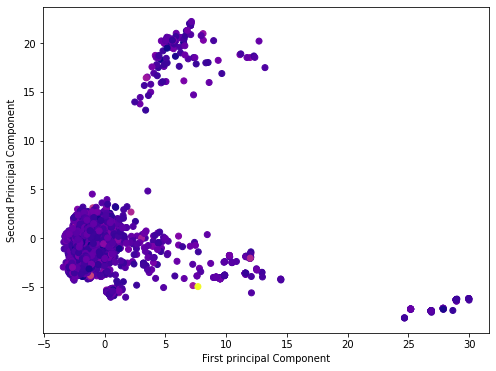

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=train['y'],cmap='plasma')
plt.xlabel('First principal Component')
plt.ylabel('Second Principal Component')

In [71]:
#XGBoost

In [72]:
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state=42)

In [73]:
model = xgbr.fit(x_train, y_train)

In [74]:
ypred_test = model.predict(x_test)
ypred_test

array([107.663704, 102.37494 , 102.57482 , ...,  89.09564 , 102.00936 ,
        99.39917 ], dtype=float32)

In [75]:
ypred_train = model.predict(x_train)
ypred_train

array([ 99.53446 , 102.702675,  96.319984, ...,  98.61626 ,  96.17458 ,
       101.20219 ], dtype=float32)

In [76]:
print(r2_score(ypred_train, y_train))

0.24660149892560312


In [77]:
print(mean_squared_error(ypred_train, y_train))

47.12593276125439


In [78]:
test_data_final_prediction = model.predict(test_data_final)
test_data_final_prediction

array([ 82.54247 ,  79.10698 , 105.050095, ..., 102.59405 ,  98.634445,
       109.8387  ], dtype=float32)

In [79]:
prediction = pd.DataFrame({'ytest':y_test,'ypred':ypred_test})

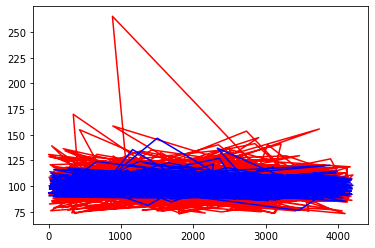

In [80]:
#sns.lmplot(x=ytest, y=ypred, data=prediction)
plt.plot(prediction['ytest'],color='red')
plt.plot(prediction['ypred'],color='Blue')
plt.show()